# Image classification using Convolutional Neural Network (CNN)

Name: Saiful Islam

Student ID: 10634911

**Convolutional Neural Network (CNN):** A Convolutional Neural Network (CNN) is a type of deep learning model primarily designed for processing structured grid data, such as images. Unlike traditional neural networks, CNNs are equipped with specialized layers called convolutional layers that can automatically and adaptively learn spatial hierarchies of features. The name "convolutional" comes from the mathematical operation applied, which focuses on local regions of the input, allowing the network to recognize patterns irrespective of their position in the image. Through successive layers, CNNs can detect more complex patterns, making them highly effective for tasks like image recognition, classification, and even video analysis.

**Dataset Selection:** In this project, rock-paper-scissors dataset is chosen for image classification. It contains three classes: rock, paper and scissor. It contains two sets of data: training & testing.
Link of the dataset:
Training: https://storage.googleapis.com/learning-datasets/rps.zip
Testing: https://storage.googleapis.com/learning-datasets/rps-test-set.zip

**Downloading dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2023-08-18 00:17:42--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  23.5MB/s    in 9.1s    

2023-08-18 00:17:51 (21.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-08-18 00:17:51--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rp

**Unzipping and saving to local tmp folder**

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

**Directory assignment**

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-092.png', 'rock05ck01-022.png', 'rock05ck01-111.png', 'rock02-057.png', 'rock03-036.png', 'rock01-009.png', 'rock03-022.png', 'rock01-013.png', 'rock06ck02-007.png', 'rock06ck02-032.png']
['paper02-074.png', 'paper01-035.png', 'paper03-024.png', 'paper05-081.png', 'paper02-042.png', 'paper05-063.png', 'paper05-093.png', 'paper05-059.png', 'paper02-014.png', 'paper03-061.png']
['scissors02-081.png', 'testscissors03-021.png', 'testscissors03-109.png', 'scissors03-078.png', 'scissors03-002.png', 'scissors01-025.png', 'scissors01-000.png', 'scissors03-059.png', 'testscissors02-058.png', 'testscissors02-062.png']


**Printing the first two images of each class**

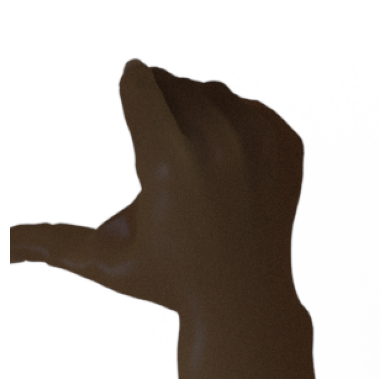

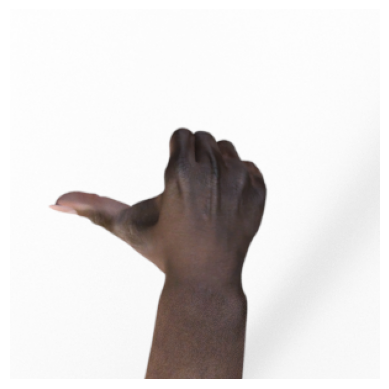

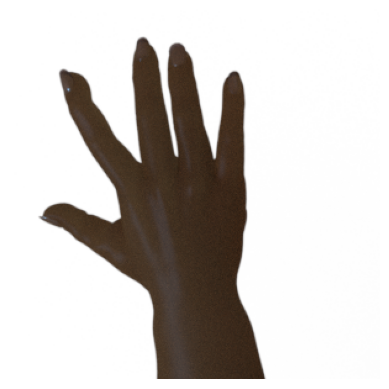

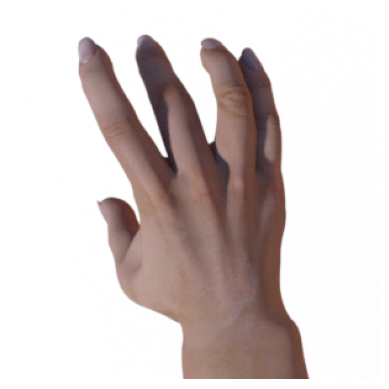

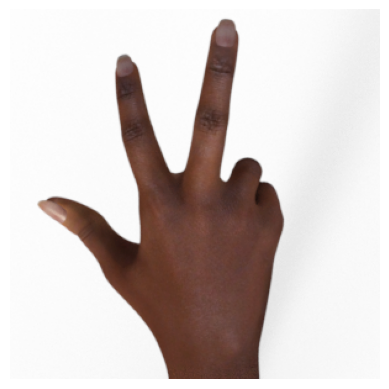

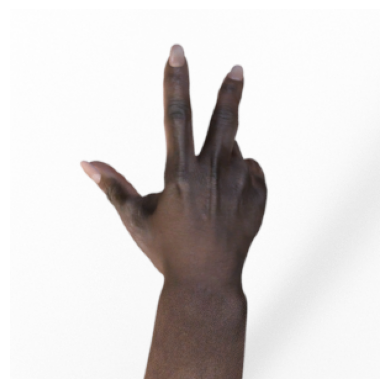

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

**Image preprocessing**

In [5]:
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


**Model design**

In [6]:
model = models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    # The second convolution
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The third convolution
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fourth convolution
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    layers.Dropout(0.5),
    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

**Model Summary**

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Visualizing Model Architecture**

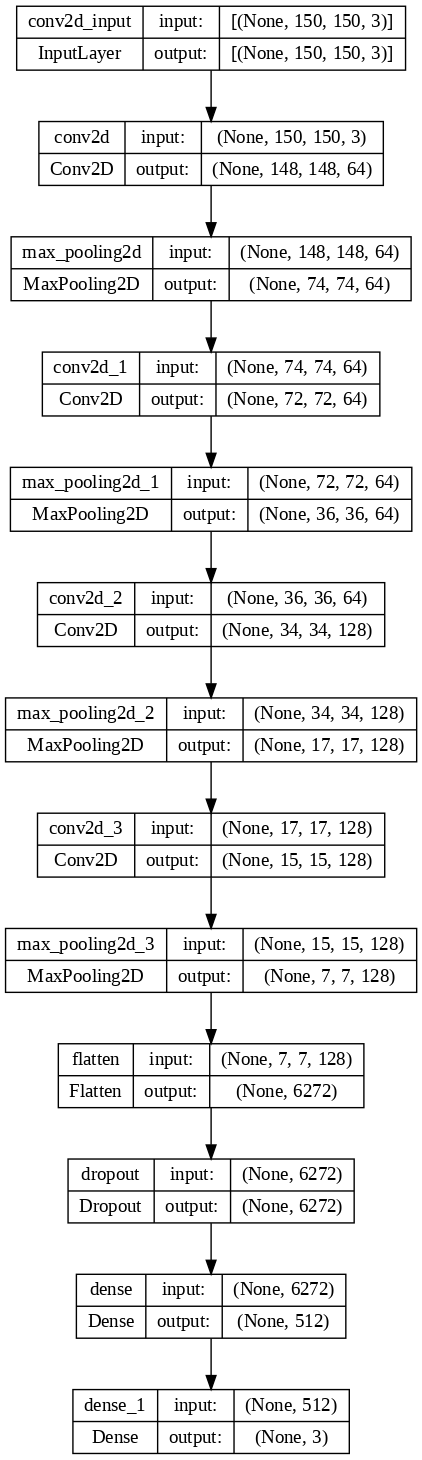

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=100)

**Setting no of Epoc**

In [9]:
epoc_no = 15

**Model Compiling & Fitting**

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_model = model.fit(train_generator, epochs=epoc_no, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/15
20/20 [==============================] - 38s 1s/step - loss: 1.2793 - accuracy: 0.3504 - val_loss: 1.0941 - val_accuracy: 0.3978
Epoch 2/15
20/20 [==============================] - 25s 1s/step - loss: 1.1064 - accuracy: 0.3786 - val_loss: 1.0858 - val_accuracy: 0.4167
Epoch 3/15
20/20 [==============================] - 23s 1s/step - loss: 1.0936 - accuracy: 0.4000 - val_loss: 1.0188 - val_accuracy: 0.3333
Epoch 4/15
20/20 [==============================] - 23s 1s/step - loss: 1.0388 - accuracy: 0.4579 - val_loss: 0.8030 - val_accuracy: 0.7769
Epoch 5/15
20/20 [==============================] - 23s 1s/step - loss: 0.9323 - accuracy: 0.5246 - val_loss: 0.7593 - val_accuracy: 0.5806
Epoch 6/15
20/20 [==============================] - 26s 1s/step - loss: 0.9142 - accuracy: 0.5722 - val_loss: 0.4471 - val_accuracy: 0.9462
Epoch 7/15
20/20 [==============================] - 23s 1s/step - loss: 0.6846 - accuracy: 0.6786 - val_loss: 0.3187 - val_accuracy: 0.9247
Epoch 8/15
20/20 [==

**Saving the compiled model**

In [11]:
model.save("rps.h5")

**Storing model history data into a DataFrame**

In [12]:
from pandas import DataFrame

model_DF = DataFrame(history_model.history)
model_DF

,loss,accuracy,val_loss,val_accuracy
0,1.279267,0.350397,1.094078,0.397849
1,1.106376,0.378571,1.085806,0.416667
2,1.093567,0.400000,1.018763,0.333333
3,1.038777,0.457936,0.802963,0.776882
4,0.932270,0.524603,0.759286,0.580645
5,0.914162,0.572222,0.447132,0.946237
6,0.684587,0.678571,0.318697,0.924731
7,0.654401,0.717857,0.628632,0.666667
8,0.577999,0.749206,0.203770,0.916667
9,0.463679,0.793254,0.205670,0.884409


**Applying VGG16 on the above dataset**

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in vgg_model.layers:
  layer.trainable = False

x = vgg_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(3, activation='softmax')(x)
vgg_model = Model(vgg_model.input, output)

58889256/58889256 [==============================] - 4s 0us/step


**Model Summary**

In [15]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**Visualizing Model Architecture**

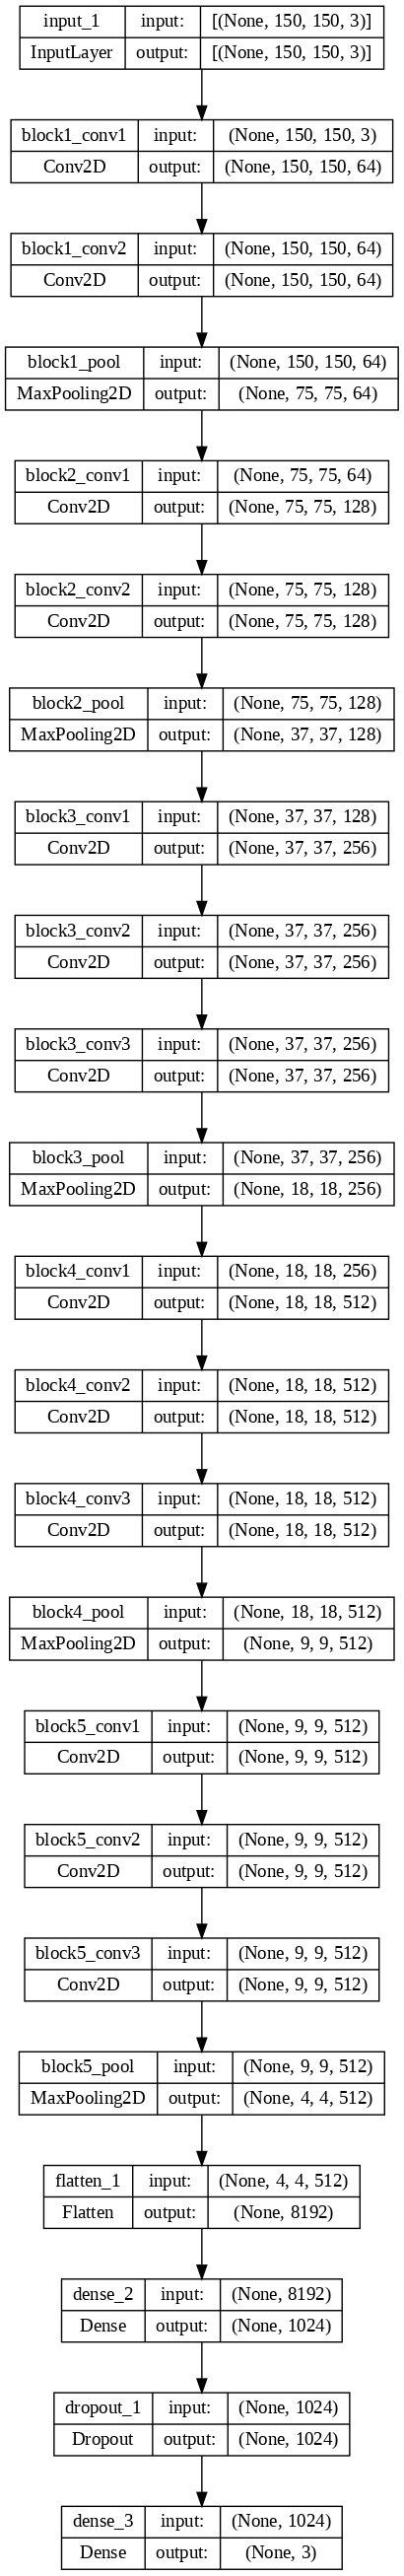

In [16]:
plot_model(vgg_model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=100)

**Model Compiling & Fitting**

In [17]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_history = vgg_model.fit( train_generator, steps_per_epoch=len(train_generator), epochs=epoc_no, verbose=1, validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/15
20/20 [==============================] - 42s 2s/step - loss: 1.6250 - accuracy: 0.6647 - val_loss: 0.0692 - val_accuracy: 0.9892
Epoch 2/15
20/20 [==============================] - 26s 1s/step - loss: 0.1523 - accuracy: 0.9460 - val_loss: 0.0708 - val_accuracy: 0.9812
Epoch 3/15
20/20 [==============================] - 26s 1s/step - loss: 0.0813 - accuracy: 0.9758 - val_loss: 0.1193 - val_accuracy: 0.9516
Epoch 4/15
20/20 [==============================] - 25s 1s/step - loss: 0.0682 - accuracy: 0.9817 - val_loss: 0.1063 - val_accuracy: 0.9435
Epoch 5/15
20/20 [==============================] - 25s 1s/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.1335 - val_accuracy: 0.9301
Epoch 6/15
20/20 [==============================] - 26s 1s/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.1346 - val_accuracy: 0.9220
Epoch 7/15
20/20 [==============================] - 27s 1s/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.2017 - val_accuracy: 0.9005
Epoch 8/15
20/20 [==

**Storing VGG16 history data into a DataFrame**

In [18]:
vgg16_DF = DataFrame(vgg_history.history)
rename_columns = {'loss': 'vgg-loss',	'accuracy': 'vgg-accuracy',	'val_loss': 'vgg-val_loss',	'val_accuracy': 'vgg-val_accuracy'}
vgg16_DF.rename(columns = rename_columns, inplace = True)
vgg16_DF

,vgg-loss,vgg-accuracy,vgg-val_loss,vgg-val_accuracy
0,1.625043,0.664683,0.069202,0.989247
1,0.152313,0.946032,0.070835,0.981183
2,0.081299,0.975794,0.119335,0.951613
3,0.068191,0.981746,0.106259,0.943548
4,0.048311,0.984524,0.133494,0.930108
5,0.043786,0.987302,0.134605,0.922043
6,0.036378,0.987698,0.201673,0.900538
7,0.030251,0.991667,0.181733,0.905914
8,0.027474,0.992063,0.099822,0.962366
9,0.024486,0.991270,0.138420,0.919355


In [19]:
from pandas import concat

histories_DF = concat([model_DF, vgg16_DF], axis=1)
histories_DF

,loss,accuracy,val_loss,val_accuracy,vgg-loss,vgg-accuracy,vgg-val_loss,vgg-val_accuracy
0,1.279267,0.350397,1.094078,0.397849,1.625043,0.664683,0.069202,0.989247
1,1.106376,0.378571,1.085806,0.416667,0.152313,0.946032,0.070835,0.981183
2,1.093567,0.400000,1.018763,0.333333,0.081299,0.975794,0.119335,0.951613
3,1.038777,0.457936,0.802963,0.776882,0.068191,0.981746,0.106259,0.943548
4,0.932270,0.524603,0.759286,0.580645,0.048311,0.984524,0.133494,0.930108
5,0.914162,0.572222,0.447132,0.946237,0.043786,0.987302,0.134605,0.922043
6,0.684587,0.678571,0.318697,0.924731,0.036378,0.987698,0.201673,0.900538
7,0.654401,0.717857,0.628632,0.666667,0.030251,0.991667,0.181733,0.905914
8,0.577999,0.749206,0.203770,0.916667,0.027474,0.992063,0.099822,0.962366
9,0.463679,0.793254,0.205670,0.884409,0.024486,0.991270,0.138420,0.919355


**Finally adding a column named "Epoc" which is epoc no**

In [20]:
histories_DF['Epoc'] = histories_DF.index + 1
histories_DF

,loss,accuracy,val_loss,val_accuracy,vgg-loss,vgg-accuracy,vgg-val_loss,vgg-val_accuracy,Epoc
0,1.279267,0.350397,1.094078,0.397849,1.625043,0.664683,0.069202,0.989247,1
1,1.106376,0.378571,1.085806,0.416667,0.152313,0.946032,0.070835,0.981183,2
2,1.093567,0.400000,1.018763,0.333333,0.081299,0.975794,0.119335,0.951613,3
3,1.038777,0.457936,0.802963,0.776882,0.068191,0.981746,0.106259,0.943548,4
4,0.932270,0.524603,0.759286,0.580645,0.048311,0.984524,0.133494,0.930108,5
5,0.914162,0.572222,0.447132,0.946237,0.043786,0.987302,0.134605,0.922043,6
6,0.684587,0.678571,0.318697,0.924731,0.036378,0.987698,0.201673,0.900538,7
7,0.654401,0.717857,0.628632,0.666667,0.030251,0.991667,0.181733,0.905914,8
8,0.577999,0.749206,0.203770,0.916667,0.027474,0.992063,0.099822,0.962366,9
9,0.463679,0.793254,0.205670,0.884409,0.024486,0.991270,0.138420,0.919355,10


**Function definitation:** training_validation_accuracy() to plot training vs validation accuracy for each model

In [21]:
from matplotlib.pyplot import plot, title, legend, figure, show

def training_valiadation_accuracy(model_history, model_name):
  epochs = range(len(model_history['accuracy']))
  plot(epochs, model_history['accuracy'], 'r', label='Training accuracy') # To get training accuracy
  plot(epochs, model_history['val_accuracy'], 'b', label='Validation accuracy') # To get validation accuracy
  title('Training and validation accuracy for: ' + model_name)
  legend(loc=0)
  figure()
  show()

**Training and validation accuracy for model**

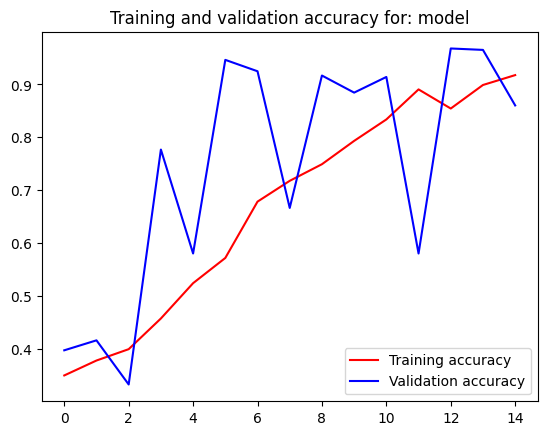

<Figure size 640x480 with 0 Axes>

In [22]:
training_valiadation_accuracy(history_model.history, 'model')

**Training and validation accuracy for VGG16**

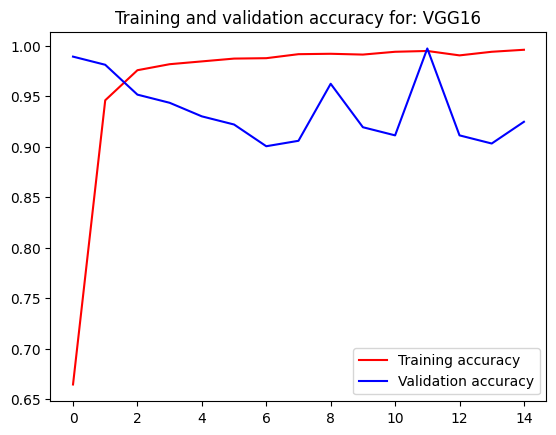

<Figure size 640x480 with 0 Axes>

In [23]:
training_valiadation_accuracy(vgg_history.history, 'VGG16')

**Histogram of Accuracy of each model vs Epoc no**

<Axes: xlabel='Epoc'>

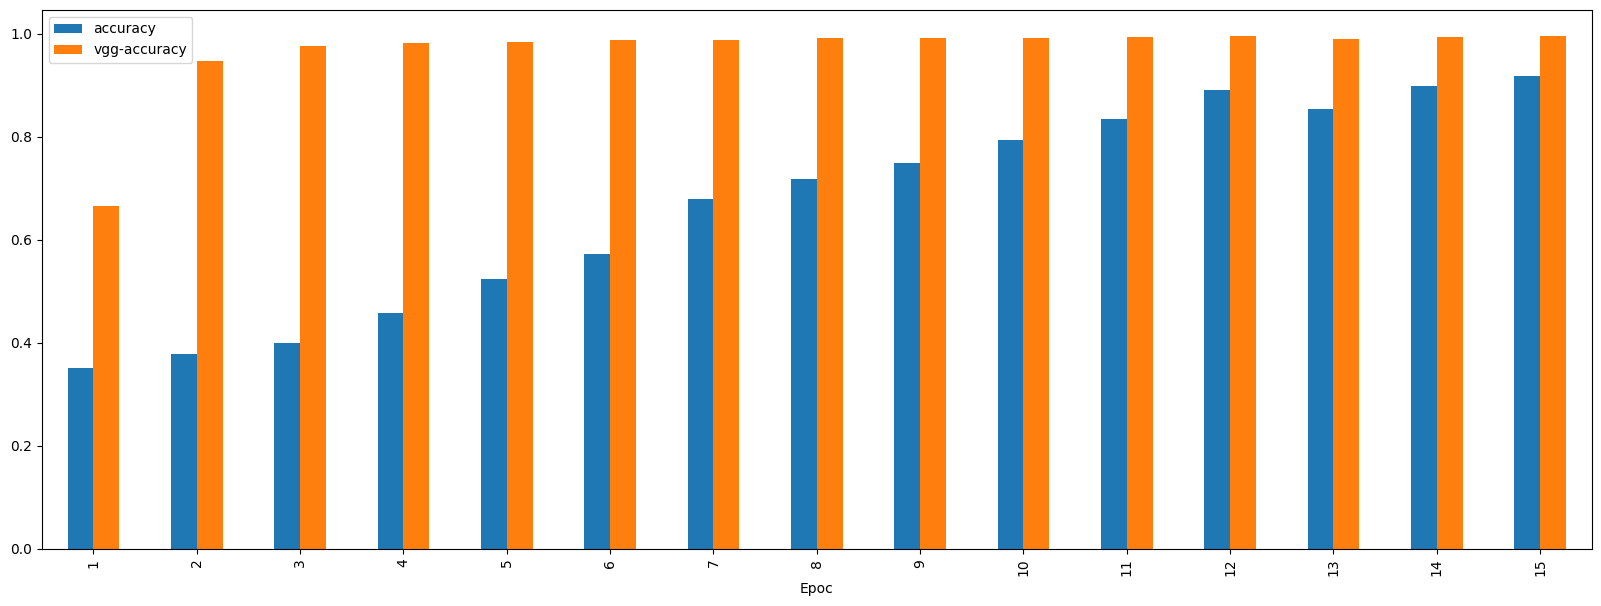

In [24]:
histories_DF.plot(x='Epoc', y=['accuracy', 'vgg-accuracy'], kind='bar', figsize=(20,7))

# Loading model from saved HDF5 file

In [25]:
from keras.models import load_model
model_saved = load_model('rps.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Conclusions:** Best Model: Based on the given results, VGG16 is the best model for this dataset as it has the highest validation accuracy and the lowest validation loss.

**Selecting the best model: VGG16**

In [26]:
best_model = vgg_model

**Saving the model for deployment**

In [27]:
best_model.save("rps.h5")

**Loading model from saved HDF5 file**

In [28]:
from keras.models import load_model

model_saved = load_model('rps.h5')
model_saved.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**Prediction**

In [29]:
from numpy import expand_dims, vstack
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = expand_dims(x, axis=0)

  images = vstack([x])
  classes = model_saved.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving testrock01-10.png to testrock01-10.png
1/1 [==============================] - 1s 737ms/step
testrock01-10.png
[[0. 1. 0.]]
